---
layout: default
title: "Logistic Regression - Multiclass Classification"
categories: logisticRegression
permalink: /ML7/
order: 7
comments: true
---

In [1]:
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


# Multiclass Classification
Sometimes we don't want $y$ to be limited to the $\{0,1\}$ values but instead we could have 3 or more possible classes $y=\{1,2,3\}$ (Notice how we dropped the $0$ class that is linked to absence)

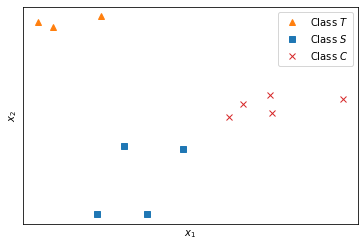

In [2]:
a = np.array([.1, 2]) + np.random.rand(3,2)
b = np.array([1, .5]) + np.random.rand(4,2)
c = np.array([2, 1.2]) + np.random.rand(5,2)

fig, ax = plt.subplots();
ax.plot(*a.T, marker='^', ls='none', c=None, markerfacecolor='C1', markeredgecolor='C1', label='Class $T$')
ax.plot(*b.T, marker='s', ls='none', c=None, markerfacecolor='C0', markeredgecolor='C0', label='Class $S$')
ax.plot(*c.T, marker='x', ls='none', c=None, markerfacecolor='C3', markeredgecolor='C3', label='Class $C$')
ax.set_xticks([])
ax.set_yticks([])
ax.legend()
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

In binary classification we could draw a decision boundary that would separate the $y=1$ space from the $y=0$ space. How could we use correctly classify three classes now?

# One Vs All classification
Let's say that we have three classes Triangles ($T$), Squares ($S$) and Crosses ($C$) as in the Figure above.

The principle of one vs all classification is turning a multiclass classfication problem in three separate binary classifications problems, fitting 3 classifiers.

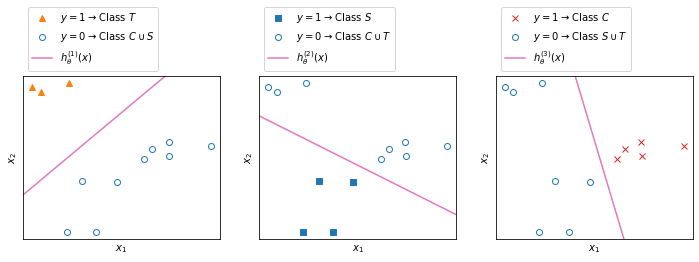

In [70]:
fig, axes = plt.subplots(1,3, figsize=(12,3))
ax1, ax2, ax3 = axes
ax1.plot(*a.T, marker='^', c=None, markerfacecolor='C1', markeredgecolor='C1', 
        ls='none', label='$y=1\\;\\to\\;$Class $T$')
ax1.plot(*np.r_[b, c].T, marker='o', c=None, markerfacecolor='w', markeredgecolor='C0', 
        ls='none', label='$y=0\\;\\to\\;$Class $C \\cup S$')
ax1.axline((np.max(a, 0)+ np.min(np.r_[b,c], 0))/2, slope=1, c='C6', label='$h_\\theta^{(1)}(x)$')

ax2.plot(*b.T, marker='s', c=None, markerfacecolor='C0', markeredgecolor='C0', 
        ls='none', label='$y=1\\;\\to\\;$Class $S$')
ax2.plot(*np.r_[a, c].T, marker='o', c=None, markerfacecolor='w', markeredgecolor='C0', 
        ls='none', label='$y=0\\;\\to\\;$Class $C \\cup T$')
ax2.axline((np.max(b, 0)+ np.min(c, 0))/2, slope=-.6, c='C6', label='$h_\\theta^{(2)}(x)$')

ax3.plot(*c.T, marker='x', c=None, markerfacecolor='C3', markeredgecolor='C3', 
        ls='none', label='$y=1\\;\\to\\;$Class $C$')
ax3.plot(*np.r_[a, b].T, marker='o', c=None, markerfacecolor='w', markeredgecolor='C0', 
        ls='none', label='$y=0\\;\\to\\;$Class $S \\cup T$')
ax3.axline((np.max(b, 0)+ np.min(c, 0))/2, slope=-4, c='C6', label='$h_\\theta^{(3)}(x)$')

for ax in axes:
    ax.legend(bbox_to_anchor=(0, 1), loc='lower left')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_xticks([])
    ax.set_yticks([]);

We want to train a logistic regression classifiers $h_\theta^{(i)}(x)=P(y=1 \mid x;\theta)$ for each class $i$, (in this case $i=1,2,3$) to predict the probability that $y=1$.

Finally on a new input $x$, to make a prediction, we will run all the classifiers and map $x$ to the class $i$ that maximizes

$$\max_{i}h_\theta^{(i)}(x)$$